In [1]:
import time
import datetime
import numpy as np
import pandas as pd
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/sales_train.csv")
item_cat = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/item_categories.csv")
items = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/items.csv")
shop = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/shops.csv")
test = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/test.csv")
result = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/xgboost.csv")


In [5]:
df1 = test.merge(result, left_on = 'ID', right_on = 'ID')

In [7]:
df1['item_cnt_month'] = round(df1['item_cnt_month'], 2)
df1.head()

,ID,shop_id,item_id,item_cnt_month
0,0,5,5037,0.90
1,1,5,5320,0.20
2,2,5,5233,1.44
3,3,5,5232,0.40
4,4,5,5268,1.54


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   shop_id         214200 non-null  int64  
 2   item_id         214200 non-null  int64  
 3   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 8.2 MB


In [10]:
df_sum = df1.groupby(by = ['shop_id'])['item_cnt_month'].sum()
df_sum = df_sum.reset_index()

In [11]:
df_sum.head()

,shop_id,item_cnt_month
0,2,1330.44
1,3,1224.26
2,4,1300.37
3,5,1541.50
4,6,1885.64


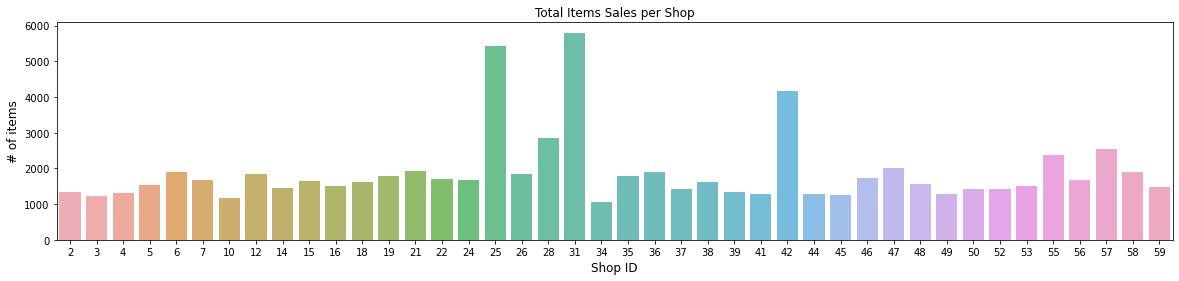

In [12]:
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_sum.shop_id, df_sum.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales per Shop")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Shop ID", fontsize=12)
plt.show()

In [13]:
# 25
# 31
# 34


In [19]:
df_litem = df1.groupby(['shop_id'])['item_cnt_month'].nlargest(5)
df_litem = df_litem.reset_index()
df_litem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shop_id         210 non-null    int64  
 1   level_1         210 non-null    int64  
 2   item_cnt_month  210 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.0 KB


In [20]:
df_litem = df_litem.merge(df1, left_on = ['shop_id','item_cnt_month'], right_on= ['shop_id','item_cnt_month'])
df_litem = df_litem.drop(['level_1','ID'], axis = 1)
df_litem.head()

,shop_id,item_cnt_month,item_id
0,2,13.04,10201
1,2,11.68,20949
2,2,9.85,10202
3,2,9.14,17717
4,2,8.54,7223


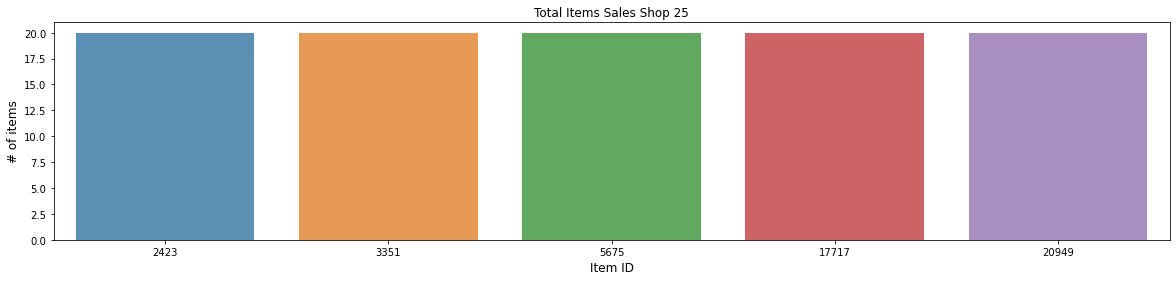

In [21]:
df_25 = df_litem.loc[df_litem['shop_id'] == 25]
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_25.item_id, df_25.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales Shop 25")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()

In [ ]:
df_25_1 = df1.loc[df1['shop_id'] == 25]


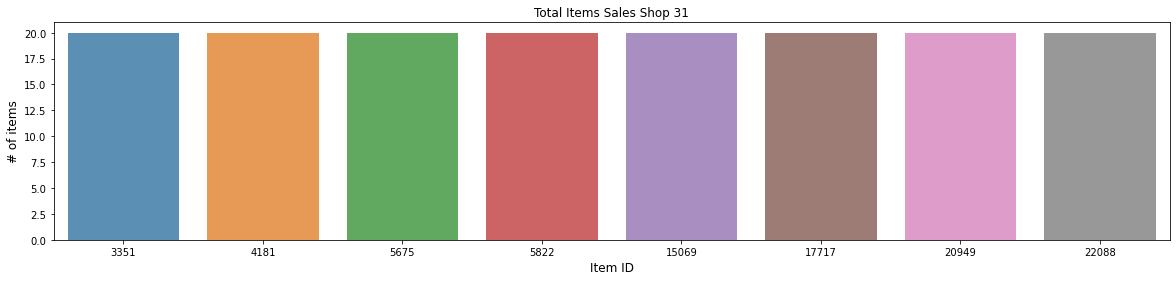

In [23]:
df_31 = df_litem.loc[df_litem['shop_id'] == 31]
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_31.item_id, df_31.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales Shop 31")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()

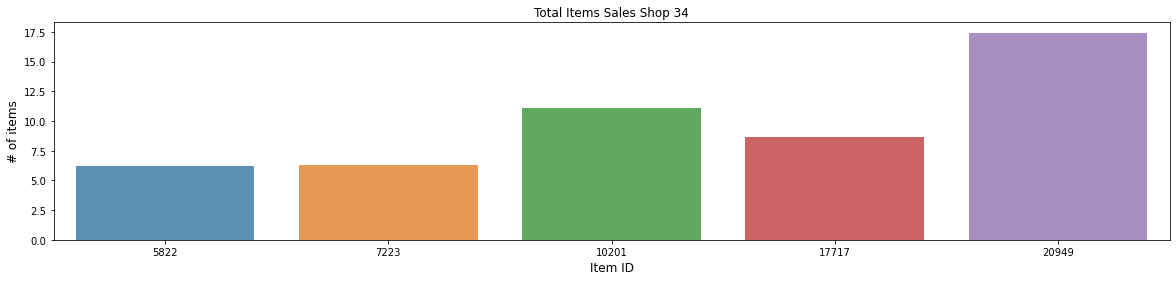

In [24]:
df_34 = df_litem.loc[df_litem['shop_id'] == 34]
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_34.item_id, df_34.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales Shop 34")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()